In [28]:
import yfinance as yf
import mplfinance as mpf
import pandas as pd

In [23]:
ticker = yf.Ticker("GBPJPY=X")
data_now = ticker.history(interval="1h", period="1wk")

In [24]:
data_now

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Datetime,,,,,,,
2023-05-01 00:00:00+01:00,171.033997,171.389999,171.018005,171.296005,0,0.0,0.0
2023-05-01 01:00:00+01:00,171.285004,171.697006,171.139999,171.626007,0,0.0,0.0
2023-05-01 02:00:00+01:00,171.632004,171.662003,171.509995,171.639999,0,0.0,0.0
2023-05-01 03:00:00+01:00,171.641006,171.966995,171.582001,171.929993,0,0.0,0.0
2023-05-01 04:00:00+01:00,171.934998,172.095001,171.839996,172.037003,0,0.0,0.0
...,...,...,...,...,...,...,...
2023-05-05 18:00:00+01:00,170.285995,170.367996,170.190002,170.257004,0,0.0,0.0
2023-05-05 19:00:00+01:00,170.257996,170.421005,170.167007,170.380997,0,0.0,0.0
2023-05-05 20:00:00+01:00,170.386993,170.421997,170.278000,170.360992,0,0.0,0.0


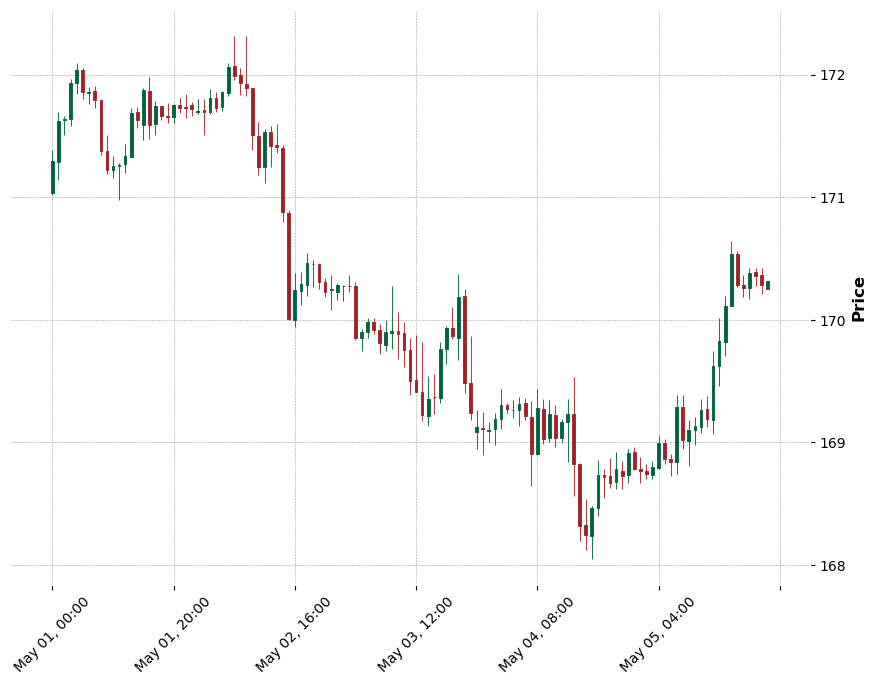

In [25]:
mpf.plot(data_now, type='candle', scale_padding=0, style='charles')

In [1]:
from sentence_transformers import SentenceTransformer
model = SentenceTransformer('all-MiniLM-L6-v2')

/Users/ryousukekaga/miniforge3/envs/forex/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
from newsapi import NewsApiClient
newsapi = NewsApiClient(api_key='b58cfc98f73e497a8c91b7f0c3bc6a50')

In [54]:
articles = newsapi.get_everything(q='forex',
                                      language='en',
                                      page=2)

In [58]:
all_articles = []
for i in range(1,articles["totalResults"]//100+1):
    _articles = [article for article in newsapi.get_everything(q='forex', language='en', page=i)["articles"]]
    all_articles.append(_articles)

NewsAPIException: {'status': 'error', 'code': 'maximumResultsReached', 'message': 'You have requested too many results. Developer accounts are limited to a max of 100 results. You are trying to request results 100 to 120. Please upgrade to a paid plan if you need more results.'}

In [59]:
df = pd.DataFrame([[article["publishedAt"], article["description"].replace("…", "").replace("...", "")]  for article in all_articles["articles"]], columns=["Time", "description"])
df["Time"] = pd.to_datetime(df["Time"])
df["Time"] = df["Time"].dt.date

TypeError: list indices must be integers or slices, not str

In [38]:
df

,Time,description
0,2023-05-02,Retail forex trading in Nigeria is mostly onli...
1,2023-04-25,There are hundreds of offshore & scam forex br...
2,2023-04-26,"Argentina has troubles with its IMF debt, but ..."
3,2023-04-12,We expect J&J to report revenues and earnings ...
4,2023-04-26,"We expect MRK stock to trade higher, with its ..."
...,...,...
95,2023-04-24,The Nigerian Diaspora community has remitted $...
96,2023-04-28,Foreign exchange is required while travelling ...
97,2023-04-17,"The ""United Arab Emirates Prepaid Card and Dig..."
98,2023-04-24,"Dublin, April 24, 2023 (GLOBE NEWSWIRE) -- The..."


In [60]:
model.encode(df["description"])

array([[ 0.02386486, -0.05822476, -0.05011068, ..., -0.05399233,
        -0.04521418,  0.04508938],
       [ 0.02867389, -0.06535016, -0.04798256, ..., -0.06922695,
        -0.01262792,  0.04870056],
       [ 0.01213609, -0.05827456, -0.00744924, ..., -0.15811756,
         0.04902723, -0.01129176],
       ...,
       [ 0.05160215,  0.02002458, -0.05077766, ..., -0.11151181,
        -0.06531645,  0.0456032 ],
       [ 0.06373225, -0.02334041, -0.03095037, ..., -0.09236967,
        -0.06544101,  0.04168716],
       [ 0.04237419, -0.00231857, -0.04590084, ..., -0.08688017,
        -0.05930405,  0.04009786]], dtype=float32)